<a href="https://colab.research.google.com/github/danielpatrickhug/Fitting_some_sets/blob/main/fitting_some_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting some sets

In [1]:
%%capture
%%bash
pip install transformers
pip install datasets
pip install sentence-transformers


In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from datasets import load_dataset

## Load NewsGroup datasets

In [3]:
dsets = ['18828_alt.atheism', '18828_comp.graphics', '18828_comp.os.ms-windows.misc', '18828_comp.sys.ibm.pc.hardware', '18828_comp.sys.mac.hardware', '18828_comp.windows.x', '18828_misc.forsale', '18828_rec.autos', '18828_rec.motorcycles', '18828_rec.sport.baseball', '18828_rec.sport.hockey', '18828_sci.crypt', '18828_sci.electronics', '18828_sci.med', '18828_sci.space', '18828_soc.religion.christian', '18828_talk.politics.guns', '18828_talk.politics.mideast', '18828_talk.politics.misc', '18828_talk.religion.misc', '19997_alt.atheism', '19997_comp.graphics', '19997_comp.os.ms-windows.misc', '19997_comp.sys.ibm.pc.hardware', '19997_comp.sys.mac.hardware', '19997_comp.windows.x', '19997_misc.forsale', '19997_rec.autos', '19997_rec.motorcycles', '19997_rec.sport.baseball', '19997_rec.sport.hockey', '19997_sci.crypt', '19997_sci.electronics', '19997_sci.med', '19997_sci.space', '19997_soc.religion.christian', '19997_talk.politics.guns', '19997_talk.politics.mideast', '19997_talk.politics.misc', '19997_talk.religion.misc']
datasets = {}
for ds in dsets:
    datasets[ds] = load_dataset("newsgroup", ds)

Generating train split:   0%|          | 0/799 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_alt.atheism/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/973 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_comp.graphics/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/985 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_comp.os.ms-windows.misc/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/982 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_comp.sys.ibm.pc.hardware/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/961 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_comp.sys.mac.hardware/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/980 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_comp.windows.x/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/972 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_misc.forsale/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/990 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_rec.autos/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/994 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_rec.motorcycles/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/994 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_rec.sport.baseball/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/999 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_rec.sport.hockey/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/991 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_sci.crypt/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/981 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_sci.electronics/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/990 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_sci.med/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/987 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_sci.space/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/997 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_soc.religion.christian/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/910 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_talk.politics.guns/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/940 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_talk.politics.mideast/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/775 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_talk.politics.misc/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/628 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/18828_talk.religion.misc/3.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_alt.atheism/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_comp.graphics/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_comp.os.ms-windows.misc/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_comp.sys.ibm.pc.hardware/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_comp.sys.mac.hardware/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_comp.windows.x/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_misc.forsale/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_rec.autos/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_rec.motorcycles/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_rec.sport.baseball/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_rec.sport.hockey/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_sci.crypt/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_sci.electronics/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_sci.med/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_sci.space/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/997 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_soc.religion.christian/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_talk.politics.guns/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_talk.politics.mideast/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_talk.politics.misc/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset newsgroup downloaded and prepared to /root/.cache/huggingface/datasets/newsgroup/19997_talk.religion.misc/1.0.0/8ea0c9dc025ecfbfd96a2c1e22caa1e1281f361946dac08205448d66f78398f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

## Sentence Embedding Model

In [4]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')
#arxiv_model = SentenceTransformer("")

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

## Distance Metric

In [5]:
def cosine_similarity(a, b):
    return np.dot(a, b)/ (np.linalg.norm(a) * np.linalg.norm(b))

## Training Centroids

In [6]:
def train_centroids(sentence_model=model, hf_datasets= datasets):
    topics = []
    for name, ds in datasets.items():
        print(name)
        text = []
        for txt in ds['train']:
            text.append(txt)
        A = model.encode(text, device='cuda')
        centroid = np.sum(A.T, axis=1)
        maxroid = np.max(A.T, axis=1)
        minroid = np.min(A.T, axis=1)
        topics.append({
            'topic_name': name,
            'docs': ds['train'],
            'embeddings': A,
            'centroid': centroid,
            'maxroid': maxroid,
            'minroid': minroid
        })
    return topics
topics = train_centroids()

18828_alt.atheism
18828_comp.graphics
18828_comp.os.ms-windows.misc
18828_comp.sys.ibm.pc.hardware
18828_comp.sys.mac.hardware
18828_comp.windows.x
18828_misc.forsale
18828_rec.autos
18828_rec.motorcycles
18828_rec.sport.baseball
18828_rec.sport.hockey
18828_sci.crypt
18828_sci.electronics
18828_sci.med
18828_sci.space
18828_soc.religion.christian
18828_talk.politics.guns
18828_talk.politics.mideast
18828_talk.politics.misc
18828_talk.religion.misc
19997_alt.atheism
19997_comp.graphics
19997_comp.os.ms-windows.misc
19997_comp.sys.ibm.pc.hardware
19997_comp.sys.mac.hardware
19997_comp.windows.x
19997_misc.forsale
19997_rec.autos
19997_rec.motorcycles
19997_rec.sport.baseball
19997_rec.sport.hockey
19997_sci.crypt
19997_sci.electronics
19997_sci.med
19997_sci.space
19997_soc.religion.christian
19997_talk.politics.guns
19997_talk.politics.mideast
19997_talk.politics.misc
19997_talk.religion.misc


In [22]:
docs = []
embeddings = None
for topic in topics:
    if embeddings is None:
        embeddings = topic['embeddings']
    else:
        embeddings = np.concatenate((embeddings, topic['embeddings']), axis=0)
    for doc in topic['docs']:
        docs.append(doc['text'])
print(embeddings.shape)
print(len(docs))

(38825, 768)
38825


In [30]:
import requests as r
def query_lexica(query):
    resp = r.get(f"https://lexica.art/api/v1/search?q={query}")
    return resp.json()

In [15]:
from PIL import Image
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

## BERT Topic 

In [ ]:
!pip install bertopic

In [25]:
docs[0]

'From: west@next02cville.wam.umd.edu (Stilgar)\nSubject: Re: Gospel Dating\n\nIn article <kmr4.1433.734039535@po.CWRU.edu> kmr4@po.CWRU.edu (Keith M.  \nRyan) writes:\n> In article <1993Apr5.163050.13308@wam.umd.edu>  \nwest@next02cville.wam.umd.edu (Stilgar) writes:\n> >In article <kmr4.1422.733983061@po.CWRU.edu> kmr4@po.CWRU.edu (Keith M.  \n> >Ryan) writes:\n> >> In article <1993Apr5.025924.11361@wam.umd.edu>  \n> >west@next02cville.wam.umd.edu (Stilgar) writes:\n> >> \n> >> >THE ILLIAD IS THE UNDISPUTED WORD OF GOD(tm)    *prove me wrong*\n> >> \n> >> \tI dispute it.\n> >> \n> >> \tErgo: by counter-example: you are proven wrong.\n> >\n> >\tI dispute your counter-example\n> >\n> >\tErgo: by counter-counter-example: you are wrong and\n> >\tI am right so nanny-nanny-boo-boo TBBBBBBBTTTTTTHHHHH\n> \n> \tNo. The premis stated that it was undisputed. \n> \n\nFine... THE ILLIAD IS THE WORD OF GOD(tm)  (disputed or not, it is)\n\nDispute that.  It won\'t matter.  Prove me wrong.\n\nBrian 

In [58]:
from bertopic import BERTopic
topic_model = BERTopic()
bert_topics, probs = topic_model.fit_transform(docs, embeddings)
topic_info = topic_model.get_topic_info()



In [59]:
topic_info = topic_model.get_topic_info()


In [60]:
topic_info

,Topic,Count,Name
0,-1,10478,-1_for_to_the_from
1,0,323,0_batf_waco_fbi_compound
2,1,247,1_espn_abc_game_hockey
3,2,234,2_armenian_turkish_armenians_genocide
4,3,182,3_atheists_atheism_atheist_altatheism
...,...,...,...
873,872,10,872_constitution_rutledge_militia_1qna9mnq8tra...
874,873,10,873_ximage_ywid_xwid_dni
875,874,10,874_astronomical_planetary_nasa_het
876,875,10,875_binaca_pappas_gray_orioles


In [ ]:
from io import BytesIO  
import IPython.display
for i in range(2,6):
    images = []
    queries = topic_model.get_topic(i)
    for key_word, score in queries[:4]:
        content = query_lexica(key_word)
        for img in content['images'][:4]:
            #print(img)
            url = img['src']
            response = r.get(url)
            img = Image.open(BytesIO(response.content))
            images.append(img)
    print(len(images))
    print(queries)
    display(image_grid(images, 4, 4))
    print('\n\n')


## cTDIDF with SVD topics

In [62]:
from sklearn.datasets import fetch_20newsgroups
from scipy import linalg

In [63]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [65]:
U, S, VT = linalg.svd(vectors, full_matrices=False)

In [66]:
vocab = np.array(vectorizer.get_feature_names())
num_top_words=8
num_topics, num_top_words = 6, 8
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [71]:
eigen_topics = show_topics(VT[:10])
eigen_topics

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

In [ ]:
for eig_topic in eigen_topics:
    images = []
    content = query_lexica(eig_topic)
    for img in content['images'][:16]:
        #print(img)
        url = img['src']
        response = r.get(url)
        img = Image.open(BytesIO(response.content))
        images.append(img)
    print(len(images))
    print(eig_topic)
    display(image_grid(images, 4, 4))
    print('\n\n')

# Calculate Mu and sigma of class distrbutions

In [74]:
import scipy
import scipy.stats

def calc_shgo_mode(data, distribution):
    def objective(x):
        return 1/distribution.pdf(x)[0]
    
    bnds = [[min(data), max(data)]]
    solution = scipy.optimize.shgo(objective, bounds= bnds, n=100*len(data))
    return solution.x[0]

def estimate_pdf(scores: list):
    """
    estimate scores probability density function
    :scores: list of distance scores from topic features to topic centroid
    :return: distribution
    """
    return scipy.stats.gaussian_kde(scores)


def calc_feature_centroid_distances(topic_embeddings, centroid):
    """
    compute distances for each topic feature and the topic centroid
    :topic_embeddings: sentence embeddings matrix for a topic
    :centroid: topic centroid
    :return: list of distance scores
    """
    return [cosine_similarity(doc, centroid).item() for doc in topic_embeddings.T.tolist()]

def calc_sigma(scores: list):
    """
    calc standard deviation of scores
    :scores: list of distances for the topic features and their centroid
    :return: standard deviation of scores list
    """
    return np.std(scores)

def get_system_topic_params(A: np.ndarray, centroid: np.ndarray):
    scores = calc_feature_centroid_distances(A, centroid)
    distribution = estimate_pdf(scores)
    mode = calc_shgo_mode(scores,distribution)
    sigma = calc_sigma(scores)
    return mode, sigma

In [75]:
for topic in topics:
    print(topic['topic_name'])
    mu, sigma = get_system_topic_params(topic['A'].T, topic['centroid'])
    print(mu, sigma)
    topic['mu'] = mu
    topic['sigma'] = sigma

TypeError: ignored

## Interpolating from the minimum topic vector to the maximum topic vector 
The question was if I interpolated between the min vector and the max vector of a class would it pass through the mean centroid?



In [13]:
def slerp(t, v0, v1, DOT_THRESHOLD=0.9995):
    #Spherically interpolate between two embedding vectors

    if not isinstance(v0, np.ndarray):
        inputs_are_torch = True
        input_device = v0.device
        v0 = v0.cpu().numpy()
        v1 = v1.cpu().numpy()

    dot = np.sum(v0 * v1 / (np.linalg.norm(v0) * np.linalg.norm(v1)))
    if np.abs(dot) > DOT_THRESHOLD:
        v2 = (1 - t) * v0 + t * v1

    else:
        theta_0 = np.arccos(dot)
        sin_theta_0 = np.sin(theta_0)
        theta_t = theta_0 * t
        sin_theta_t = np.sin(theta_t)
        s0 = np.sin(theta_0 - theta_t) / sin_theta_0
        s1 = sin_theta_t / sin_theta_0
        v2 = s0 * v0 + s1 * v1

    return v2

18828_alt.atheism
0.86155564


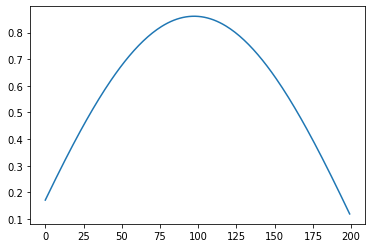

18828_comp.graphics
0.80060965


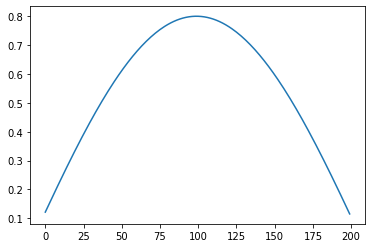

18828_comp.os.ms-windows.misc
0.82399213


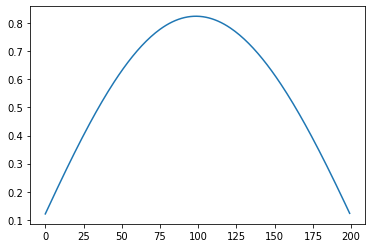

18828_comp.sys.ibm.pc.hardware
0.8431012


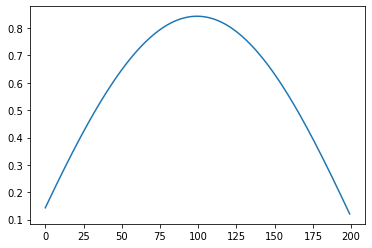

18828_comp.sys.mac.hardware
0.83890915


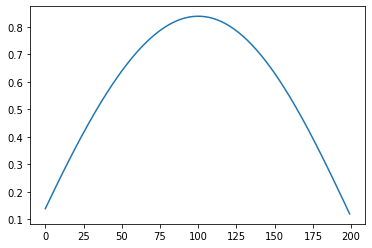

18828_comp.windows.x
0.8420309


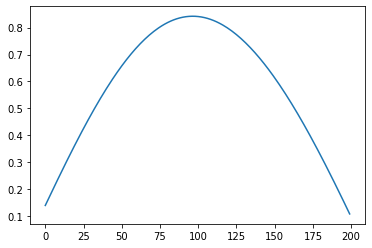

18828_misc.forsale
0.86316866


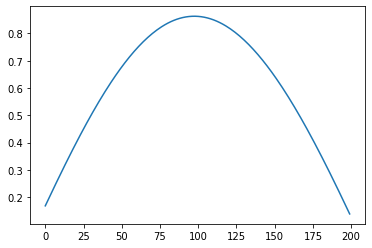

18828_rec.autos
0.8261068


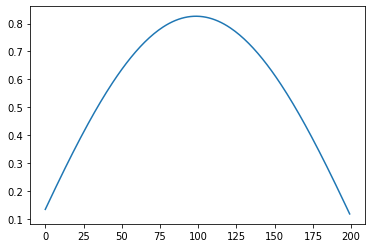

18828_rec.motorcycles
0.8103351


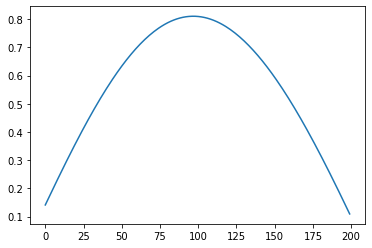

18828_rec.sport.baseball
0.8780945


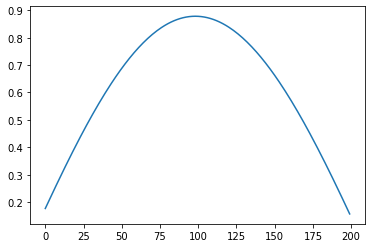

18828_rec.sport.hockey
0.90115833


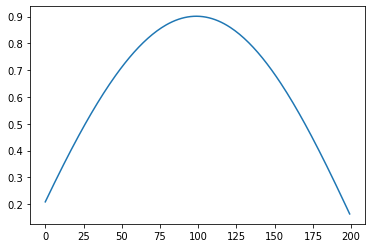

18828_sci.crypt
0.8508807


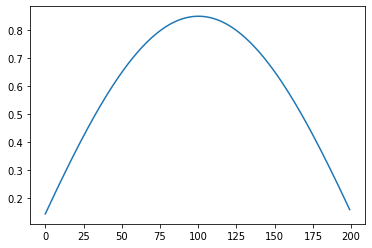

18828_sci.electronics
0.77210075


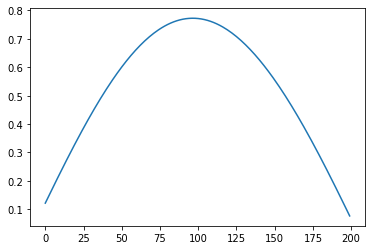

18828_sci.med
0.78689766


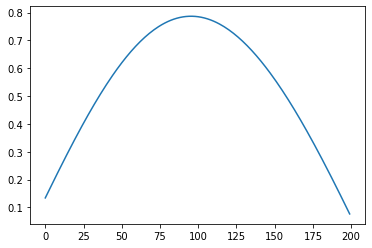

18828_sci.space
0.7771147


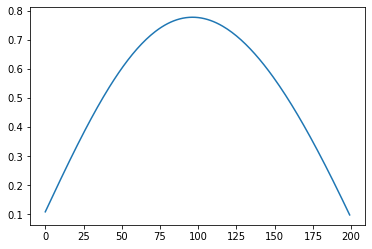

18828_soc.religion.christian
0.8465863


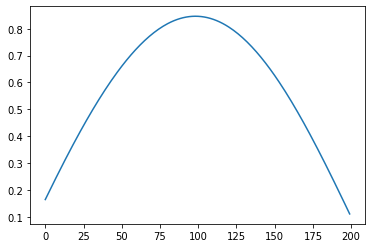

18828_talk.politics.guns
0.885207


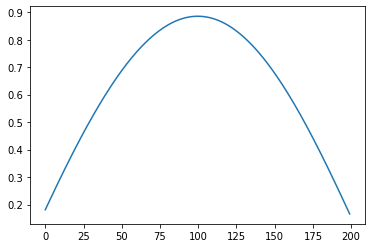

18828_talk.politics.mideast
0.89103943


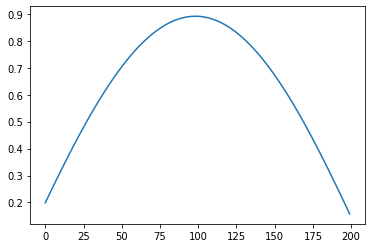

18828_talk.politics.misc
0.84611845


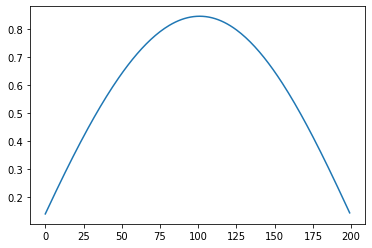

18828_talk.religion.misc
0.8239192


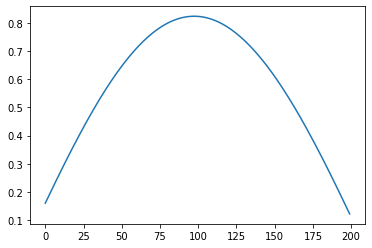

19997_alt.atheism
0.9086124


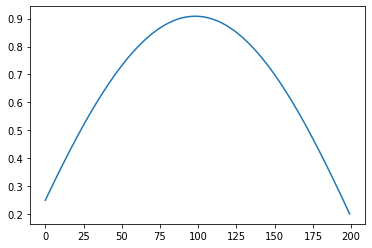

19997_comp.graphics
0.86462975


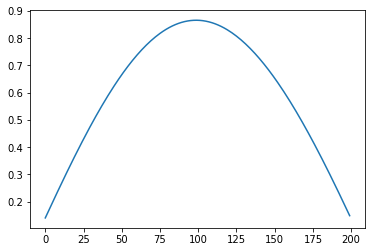

19997_comp.os.ms-windows.misc
0.8651984


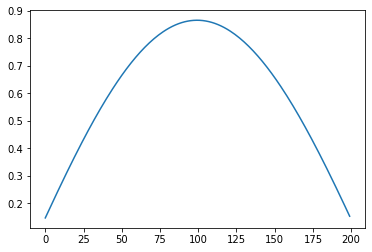

19997_comp.sys.ibm.pc.hardware
0.8703853


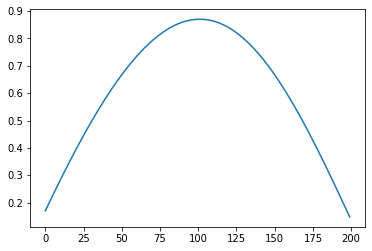

19997_comp.sys.mac.hardware
0.8910256


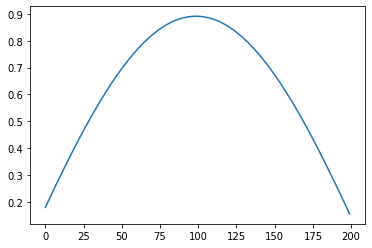

19997_comp.windows.x
0.8899301


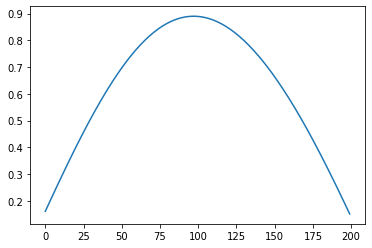

19997_misc.forsale
0.8926856


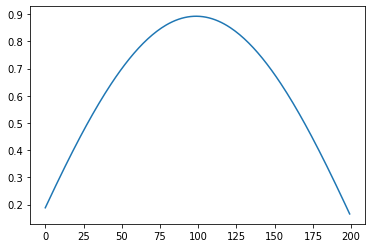

19997_rec.autos
0.8719233


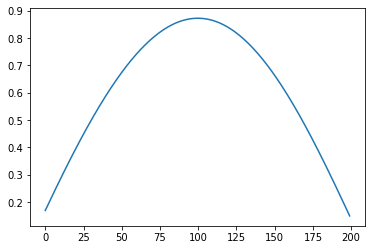

19997_rec.motorcycles
0.9081317


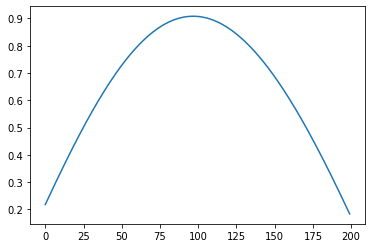

19997_rec.sport.baseball
0.9309551


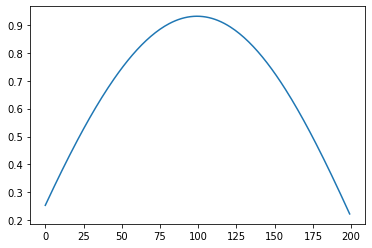

19997_rec.sport.hockey
0.9338802


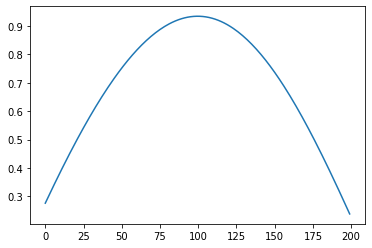

19997_sci.crypt
0.8936118


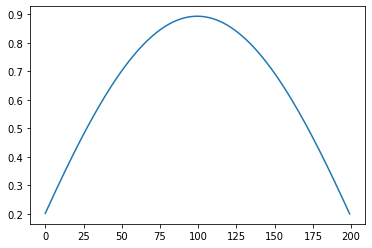

19997_sci.electronics
0.8231091


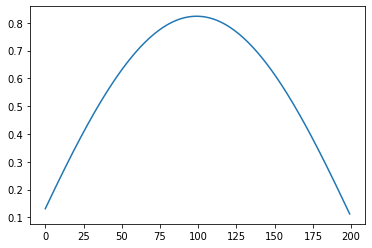

19997_sci.med
0.8318783


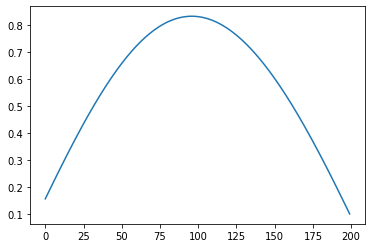

19997_sci.space
0.86036336


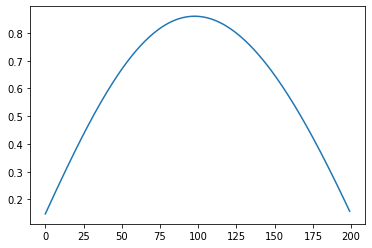

19997_soc.religion.christian
0.8913993


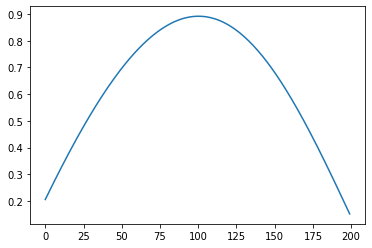

19997_talk.politics.guns
0.9424403


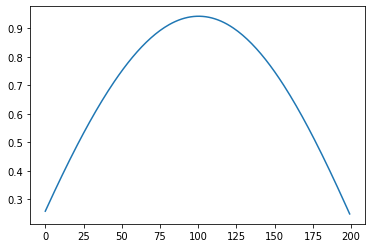

19997_talk.politics.mideast
0.9347636


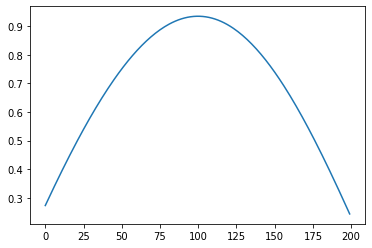

19997_talk.politics.misc
0.9141368


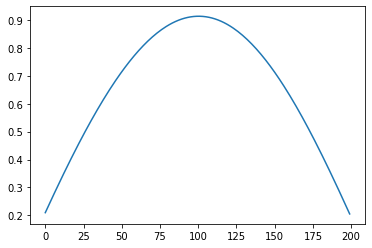

19997_talk.religion.misc
0.8957196


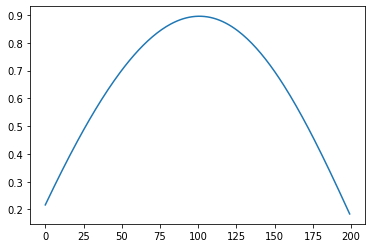

In [14]:

for topic in topics:
    sims= []
    interp_vectors = []
    for i, t in enumerate(np.linspace(0, 1, 200)):
        #init = torch.lerp( torch.tensor(d['minroid']), torch.tensor(d['maxroid']), float(t))
        init = slerp(float(t), topic['minroid'], topic['maxroid'])
        sim = cosine_similarity(init, topic['centroid'])
        sims.append(sim)
        if i in [50, 100, 150]:
            topic[f'{i}_interp'] = init
    print(topic['topic_name'])
    print(max(sims))

    plt.plot(sims)
    plt.show()

In [75]:
import heapq
import numpy as np

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def classify_top_k(query, k):
    scores = []
    for topic_dict in topics:
        sim = cosine_similarity(query, topic_dict['centroid'])
        if sim >= topic_dict['mu'] - 3*topic_dict['sigma']:
            scores.append((topic_dict['topic_name'], sim))
    if len(scores) > 1:
        scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:k]


def classify_top_k_heap(query, k):
    top_k = []
    bottom_k = []
    for topic_dict in topics:
        sim = cosine_similarity(query, topic_dict['centroid'])
        if sim >= topic_dict['mu'] - 3*topic_dict['sigma']:
            if len(top_k) < k:
                heapq.heappush(top_k, (sim, topic_dict['topic_name']))
                heapq.heappush(bottom_k, -sim)
            else:
                if sim > bottom_k[0]:
                    heapq.heappushpop(top_k, (sim, topic_dict['topic_name']))
                    heapq.heappushpop(bottom_k, -sim)
    return top_k


In [71]:
from time import perf_counter
qu = """
    Whether you're looking to sell a MacBook, pass it off to a friend or family member or even recycle it, you'll want to reset your Mac. Doing so will remove any files, log you out of any accounts, clear out your apps and ensure that wherever your MacBook Pro, MacBook Air, Mac Mini, iMac or other macOS device doesn't have traces of your information.

The instructions below are primarily for macOS Ventura and later, but we'll list a few tweaks to how to do this on macOS Montere and some older Macs as well.

Just like if you're going to factory reset a Windows PC, back up your data first, whether it's through iCloud, Time Machine or non-Apple service. You don't want to lose anything when you reset your MacBook."""
q = model.encode(qu)

In [1]:
t0 = perf_counter()
scores = classify_top_k(q, 4)
t1 = perf_counter()
print(f'Time: {t1 - t0}')
print(scores)


NameError: ignored